In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
seq = get_standardized_measures('results/sequential_100.csv')
seq_time_tot = seq['TOTAL'].mean()

In [3]:
data = get_standardized_measures('results/thr_100.csv', excluded_columns=['P_DEGREE'])

In [4]:
data

,P_DEGREE,READING,TOTAL
0,1,122203849,122203925
1,1,120000297,120000379
2,1,121090569,121090653
3,1,124201362,124201451
4,1,122194417,122194498
...,...,...,...
95,20,10935251,10935352
96,20,11401237,11401331
97,20,10849793,10849880
98,20,11490317,11490428


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

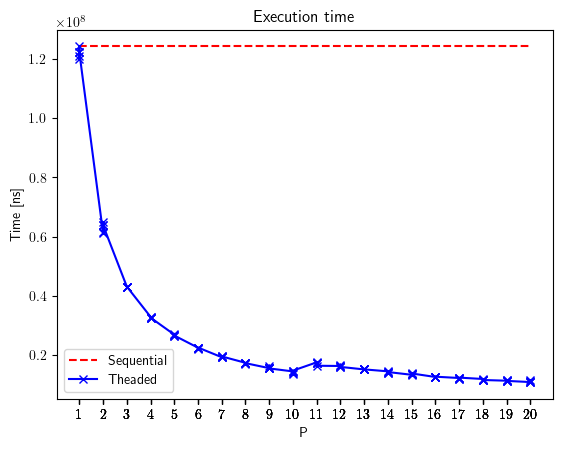

In [6]:
# setting up the plot
plt.title('Execution time')
plt.xticks(data['P_DEGREE'])
plt.xlabel("P")
plt.ylabel("Time [ns]")

# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [7]:
import pandas as pd

In [8]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).mean()

In [9]:
sp_data

,P_DEGREE,READING,TOTAL
0,1,121938098.8,121938181.2
1,2,63098904.8,63098992.8
2,3,43129502.8,43129592.6
3,4,32771386.2,32771475.8
4,5,26757658.6,26757762.6
5,6,22372235.4,22372325.4
6,7,19488858.4,19488949.0
7,8,17290659.4,17290751.0
8,9,15784143.8,15784232.6
9,10,14290113.4,14290204.4


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [10]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [11]:
sp_data

,P_DEGREE,READING,TOTAL,S_p
0,1,121938098.8,121938181.2,1.018723
1,2,63098904.8,63098992.8,1.968673
2,3,43129502.8,43129592.6,2.880187
3,4,32771386.2,32771475.8,3.790530
4,5,26757658.6,26757762.6,4.642439
5,6,22372235.4,22372325.4,5.552453
6,7,19488858.4,19488949.0,6.373934
7,8,17290659.4,17290751.0,7.184262
8,9,15784143.8,15784232.6,7.869960
9,10,14290113.4,14290204.4,8.692757


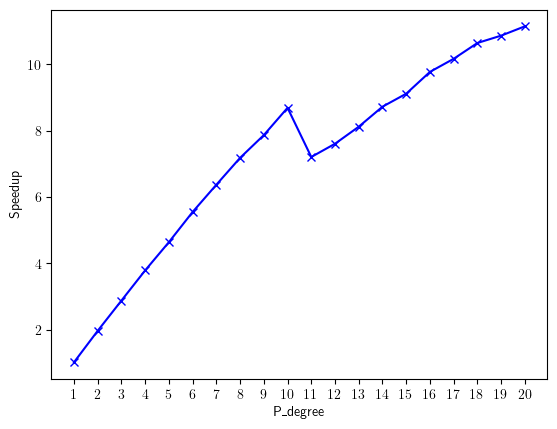

In [19]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Speedup')

plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], 'x-b')

# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [13]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    121938181.2
Name: TOTAL, dtype: float64

In [14]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


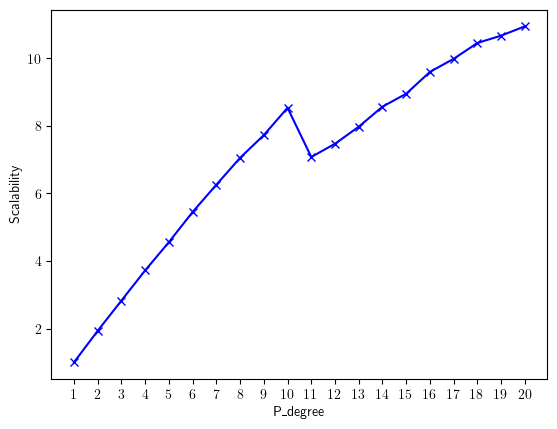

In [15]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')